In [101]:
import numpy as np
import pandas as pd
import random, math


In [102]:
class Node():
    def __init__(self, values):
        self.values = np.array(values)
        self.k = 0
        self.belonging_rates = []

    def set_k(self, k):
        self.k = k
    
    def set_belonging_rates(self, blng_rates):
        self.belonging_rates = blng_rates

In [103]:
def load_files(directory):
    data_sets = []   
    os.chdir(r"{}".format(directory))
    files = os.listdir()
    for file in files:
        data = pd.read_csv(''.join(file))
        data_sets.append(data)
    os.chdir(r"..")
    return data_sets


In [104]:
data_sets = load_files('data')

In [105]:
def data_to_node(data_set):
    nodes = []
    for index, row in data_set.iterrows():
        node = Node(values= list(row))
        nodes.append(node)
    return np.array(nodes)

In [106]:
node_sets = []
for ds in data_sets:
    node_sets.append(data_to_node(ds))

In [107]:
def gen_rand(length):
    n = random.randint(0,length)
    return n

# calculate belonging rate of kth node to ith cluster
def cal_blng_r(Xk, Vi, c, m, node_set):
    distance_Xk_Vi = np.linalg.norm(Xk.values - Vi.values)
    dis_sum, Uik = 0, 0
    for j in range(c):
        Vj = node_set[j]
        distance_Xk_Vj = np.linalg.norm(Xk.values - Vj.values)
        if distance_Xk_Vj != 0:
            dis_sum += math.pow((distance_Xk_Vi/distance_Xk_Vj), 2/(m-1))
    if dis_sum != 0:
        Uik = 1/(dis_sum)
    return Uik

In [108]:
def update_centroid_node(i, node_set, m):
    sum_top, sum_bottom = 0, 0
    cal_weighted_avg
    for node in node_set:
        sum_bottom += math.pow(node.belonging_rates[i], m)
        sum_top += math.pow(node.belonging_rates[i], m)*node.values
    return sum_top/sum_bottom

In [110]:
node_set = node_sets[0]
for k in range(2,3):
    m=2
    centroid_nodes = []
    # set random centroid nodes
    for _ in range(k):
        n = gen_rand(len(node_set))
        centroid_nodes.append(node_set[n])
    # repeat 100 types
    for _ in range(100):
        # calculate belonging rates 
        for node in node_set:
            belonging_rates = []
            for clus_center in centroid_nodes:
                    belonging_rates.append(cal_blng_r(Xk=node, Vi=clus_center, c=len(node_set), m=m, node_set=node_set))
            node.set_belonging_rates(belonging_rates)
        # calculate new centroid nodes
        for i in range(len(centroid_nodes)):
            centroid_nodes[i] = Node(update_centroid_node(i, node_set, m))


In [116]:
node_set[63].belonging_rates

#distance = np.linalg.norm(node1.values - node2.values)
#print(distance)

[3.2657993045410954e-06, 1.9837966049468532e-05]

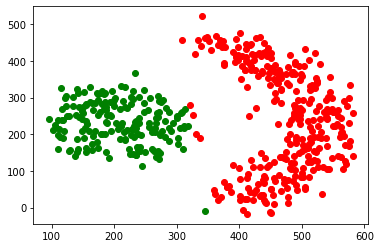

In [145]:
import numpy as np
import matplotlib.pyplot as plt

colors=['red','green','blue','black']

for node in node_set:
    clr = colors[node.belonging_rates.index(max(node.belonging_rates))]
    plt.scatter(node.values[0], node.values[1], color=clr)
plt.show()


In [135]:
color = node_set[34].belonging_rates.index(max(node_set[34].belonging_rates))
color


1